# **TikTok Project**
**Course 6 - The Nuts and bolts of machine learning**

Recall that you are a data professional at TikTok. Your supervisor was impressed with the work you have done and has requested that you build a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

A notebook was structured and prepared to help you in this project. A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 6 End-of-course project: Classifying videos using machine learning**

In this activity, you will practice using machine learning techniques to predict on a binary outcome variable.
<br/>

**The purpose** of this model is to increase response time and system efficiency by automating the initial stages of the claims process.

**The goal** of this model is to predict whether a TikTok video presents a "claim" or presents an "opinion".
<br/>

*This activity has three parts:*

**Part 1:** Ethical considerations
* Consider the ethical implications of the request

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.



# **Classify videos using machine learning**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:


1.   **What are you being asked to do? What metric should I use to evaluate success of my business/organizational objective?**

2.   **What are the ethical implications of the model? What are the consequences of your model making errors?**
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a video does not contain a claim and it actually does)?

  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a video does contain a claim and it actually does not)?

3.   **How would you proceed?**


1)
* TikTok videos when reported have to be reviewed if the claim is valid (it is a violation) or if it is only an opinion (not a violation)
* since, there are many such videos reported, TikTok needs a classification system that processes the claim and indicate it to the moderator who reviews it
* this system can be used to prioritize the claims and can be helpful to moderators to immediately focus and decide on the most important videos in quick time

2)
* False positives --> unknowingly classifying a video, which is 'actually an opinion', as a claim
* False negatives --> unknowingly letting go of a video, which is 'actually a claim', and misclassifying it as an opinion
* Ethical implications --> If a video which is indeed a claim, if let go, it has severe consequences, than an opinion being classified as a claim. This is the usual model in many other social media sites. Thus, the cost of False Negatives outweigh the False Positives. If, the higher management gives more weightage on NOT letting an innocent video (opinion) being punished than an actual violating video let go, we need to consider otherwise.
* the reasoning from the above point, where the FNs are much more costlier than FPs, we can choose Recall to be more important than FPR or even precision


3)
* EDA
* data cleaning and validation (handling nulls, errors, outliers, data types)
* prepare the data for classification (encoding cat variables, separate train/test/validation sets)
* fit the model using the preferred model
* choose the best hyperparameters (champion model) using cross-validation
* evaluate the model on the test set and report the findings



**Modeling workflow and model selection process**

Previous work with this data has revealed that there are ~20,000 videos in the sample. This is sufficient to conduct a rigorous model validation workflow, broken into the following steps:

1. Split the data into train/validation/test sets (60/20/20)
2. Fit models and tune hyperparameters on the training set
3. Perform final model selection on the validation set
4. Assess the champion model's performance on the test set

![](https://raw.githubusercontent.com/adacert/tiktok/main/optimal_model_flow_numbered.svg)


### **Task 1. Imports and data loading**

Start by importing packages needed to build machine learning models to achieve the goal of this project.

In [1]:
# Import packages for data manipulation
### YOUR CODE HERE ###
import pandas as pd
import numpy as np

# Import packages for data visualization
### YOUR CODE HERE ###
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split, GridSearchCV

# Import packages for data modeling
### YOUR CODE HERE ###
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

Now load the data from the provided csv file into a dataframe.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe
data = pd.read_csv('/kaggle/input/tiktok-dataset-1/tiktok_dataset.csv')

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

### **Task 2: Examine data, summary info, and descriptive stats**

Inspect the first five rows of the dataframe.

In [3]:
# Display first few rows
### YOUR CODE HERE ###
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [4]:
# Get number of rows and columns
### YOUR CODE HERE ###
data.shape

(19382, 12)

Get the data types of the columns.

In [5]:
# Get data types of columns
### YOUR CODE HERE ###
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [6]:
# Get basic information
### YOUR CODE HERE ###
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Generate basic descriptive statistics about the dataset.

In [7]:
# Generate basic descriptive stats
### YOUR CODE HERE ###
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [8]:
# Check for missing values
### YOUR CODE HERE ###
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [9]:
# Drop rows with missing values
### YOUR CODE HERE ###
data = data.dropna(axis=0)

In [10]:
# Display first few rows after handling missing values
### YOUR CODE HERE ###
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Check for and handle duplicates.

In [11]:
# Check for duplicates
### YOUR CODE HERE ###
data.duplicated().sum()

0

Check for and handle outliers.

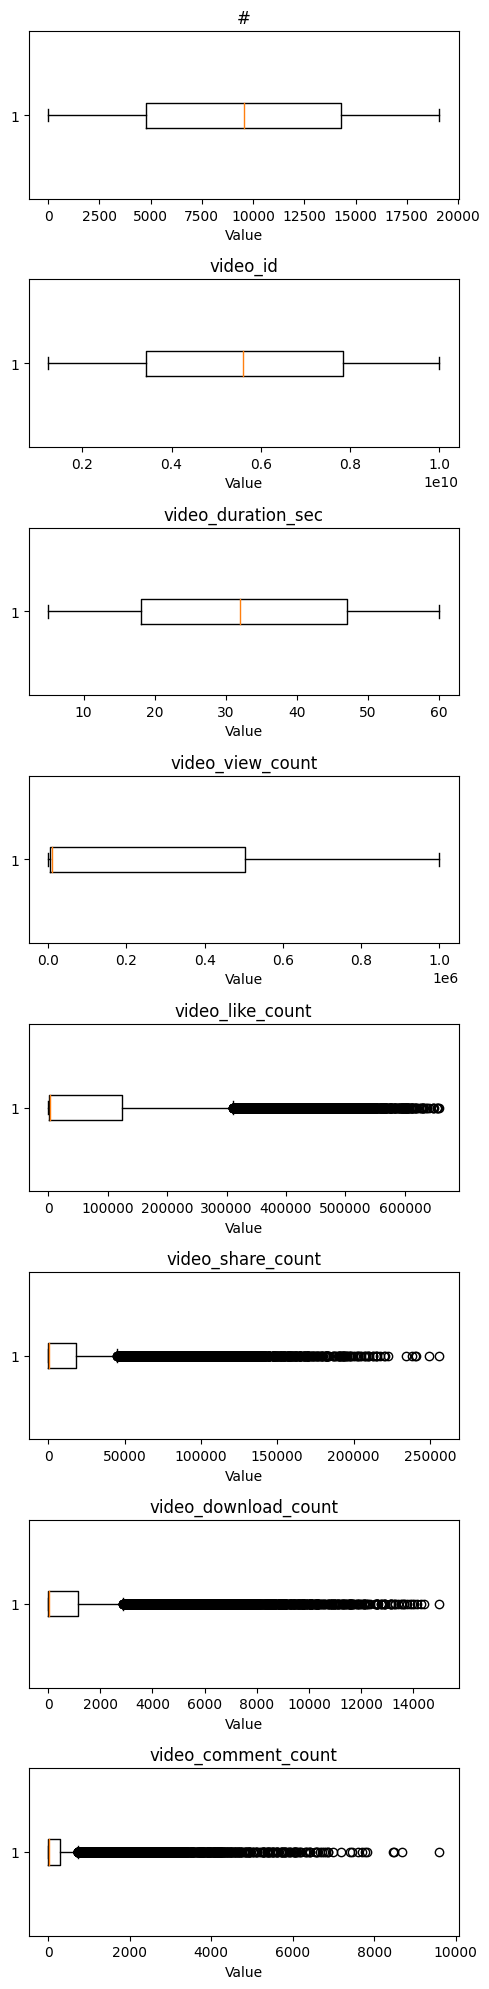

In [12]:
### YOUR CODE HERE ###

# Select only numerical columns
numerical_df = data.select_dtypes(include=['number'])

# Create a figure and axes for the boxplots
fig, axs = plt.subplots(nrows=len(numerical_df.columns), ncols=1, figsize=(5,20))

# Plot horizontal boxplots for each numerical column
for i, column in enumerate(numerical_df.columns):
    axs[i].boxplot(numerical_df[column], vert=False)  # Set vert=False for horizontal boxplot
    axs[i].set_title(column)
    axs[i].set_xlabel('Value')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


# all the outliers are not due to errors
# if we are building tree models, no more processing of outliers is needed, because those handles them well with the right representation

Check class balance.

In [13]:
# Check class balance
### YOUR CODE HERE ###
data["claim_status"].value_counts(normalize=True)

claim_status
claim      0.503458
opinion    0.496542
Name: proportion, dtype: float64

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**
Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3: Feature engineering**

Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [14]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
### YOUR CODE HERE ###
data['text_length'] = data['video_transcription_text'].str.len()
data

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19079,19080,opinion,1492320297,49,in our opinion the earth holds about 11 quinti...,not verified,active,6067.0,423.0,81.0,8.0,2.0,65
19080,19081,opinion,9841347807,23,in our opinion the queens in ant colonies live...,not verified,active,2973.0,820.0,70.0,3.0,0.0,66
19081,19082,opinion,8024379946,50,in our opinion the moon is moving away from th...,not verified,active,734.0,102.0,7.0,2.0,1.0,53
19082,19083,opinion,7425795014,8,in our opinion lightning strikes somewhere on ...,not verified,active,3394.0,655.0,123.0,11.0,4.0,80


Calculate the average text_length for claims and opinions.

In [15]:
# Calculate the average text_length for claims and opinions
### YOUR CODE HERE ###
print('Average text_length for claims and opinions:')
data[['claim_status', 'text_length']].groupby('claim_status').mean()

Average text_length for claims and opinions:


,text_length
claim_status,
claim,95.376978
opinion,82.722562


Visualize the distribution of `text_length` for claims and opinions.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

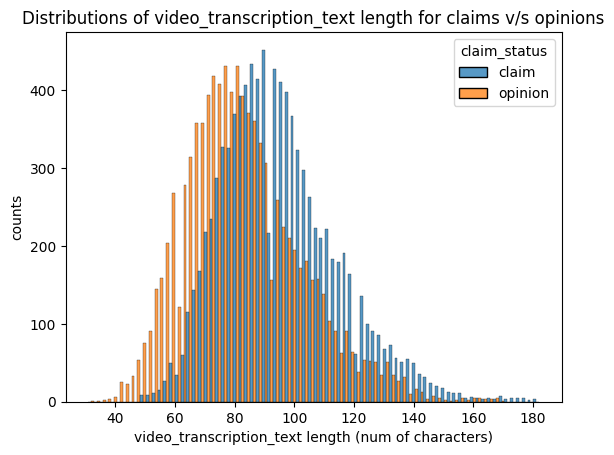

In [16]:
# Visualize the distribution of `text_length` for claims and opinions
# Create two histograms in one plot
### YOUR CODE HERE ###
sns.histplot(data=data, multiple="dodge", x="text_length", hue="claim_status", legend=True)

# plot attributes
plt.xlabel("video_transcription_text length (num of characters)")
plt.ylabel("counts")
plt.title("Distributions of video_transcription_text length for claims v/s opinions")
plt.show()

**Feature selection and transformation**

Encode target and catgorical variables.

In [17]:
# Create a copy of the X data
### YOUR CODE HERE ###
X = data.copy()

# Drop unnecessary columns
### YOUR CODE HERE ###
X = X.drop(['#', 'video_id'], axis=1)

# Encode target variable
### YOUR CODE HERE ###
X['claim_status'] = X['claim_status'].replace({'opinion': 0, 'claim': 1})

# Dummy encode remaining categorical values
### YOUR CODE HERE ###
X = pd.get_dummies(X, columns=['verified_status', 'author_ban_status'],drop_first=True)

X.tail()

<ipython-input-17-5047f00c0b89>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['claim_status'] = X['claim_status'].replace({'opinion': 0, 'claim': 1})


,claim_status,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
19079,0,49,in our opinion the earth holds about 11 quinti...,6067.0,423.0,81.0,8.0,2.0,65,False,False,False
19080,0,23,in our opinion the queens in ant colonies live...,2973.0,820.0,70.0,3.0,0.0,66,False,False,False
19081,0,50,in our opinion the moon is moving away from th...,734.0,102.0,7.0,2.0,1.0,53,False,False,False
19082,0,8,in our opinion lightning strikes somewhere on ...,3394.0,655.0,123.0,11.0,4.0,80,False,False,False
19083,0,58,in our opinion a pineapple plant can only prod...,5034.0,815.0,281.0,11.0,1.0,70,False,False,False


### **Task 4: Split the data**

Assign target variable.

In [18]:
# Isolate target variable
### YOUR CODE HERE ###
y = X['claim_status']

Isolate the features.

In [19]:
# Isolate features
### YOUR CODE HERE ###
X = X.drop(['claim_status', 'video_transcription_text'], axis=1)

# Display first few rows of features dataframe
### YOUR CODE HERE ###
X.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,59,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,32,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,31,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,25,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,19,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


#### **Task 5: Create train/validate/test sets**

Split data into training and testing sets, 80/20.

In [20]:
# Split the data into training and testing sets
### YOUR CODE HERE ###
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Split the training set into training and validation sets, 75/25, to result in a final ratio of 60/20/20 for train/validate/test sets.

In [21]:
# Split the training data into training and validation sets
### YOUR CODE HERE ###
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0)

Confirm that the dimensions of the training, validation, and testing sets are in alignment.

In [22]:
# Get shape of each training, validation, and testing set
### YOUR CODE HERE ###
print('X train | val | test:', X_train.shape, X_val.shape, X_test.shape)
print()
print('y train | val | test:',y_train.shape, y_val.shape, y_test.shape)

X train | val | test: (11450, 10) (3817, 10) (3817, 10)

y train | val | test: (11450,) (3817,) (3817,)


### **Task 6. Build models**


### **Build a random forest model**

Fit a random forest model to the training set. Use cross-validation to tune the hyperparameters and select the model that performs best on recall.

In [23]:
# Instantiate the random forest classifier
### YOUR CODE HERE ###
rf = RandomForestClassifier(random_state=0)

# Create a dictionary of hyperparameters to tune
### YOUR CODE HERE ###

# commented the full validation hyperparameters after finding the best hyperparams
#cv_params = {'max_depth': [5, 7, None],
#             'max_features': [0.3, 0.6],
#            #  'max_features': 'auto'
#             'max_samples': [0.7],
#             'min_samples_leaf': [1,2],
#             'min_samples_split': [2,3],
#             'n_estimators': [75,100,200],
#             }

cv_params = {'max_depth': [None],
             'max_features': [0.6],
            #  'max_features': 'auto'
             'max_samples': [0.7],
             'min_samples_leaf': [1],
             'min_samples_split': [2],
             'n_estimators': [200],
             }


# Define a list of scoring metrics to capture
### YOUR CODE HERE ###
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
### YOUR CODE HERE ###
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')

In [24]:
### Fit the model to the data 
### YOUR CODE HERE ###
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [None], 'max_features': [0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [200]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [25]:
# Examine best recall score
### YOUR CODE HERE ###
rf_cv.best_score_

0.9908534395531852

In [26]:
# Examine best parameters
### YOUR CODE HERE ###
rf_cv.best_params_

{'max_depth': None,
 'max_features': 0.6,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

Check the precision score to make sure the model isn't labeling everything as claims. You can do this by using the `cv_results_` attribute of the fit `GridSearchCV` object, which returns a numpy array that can be converted to a pandas dataframe. Then, examine the `mean_test_precision` column of this dataframe at the index containing the results from the best model. This index can be accessed by using the `best_index_` attribute of the fit `GridSearchCV` object.

In [27]:
# Access the GridSearch results and convert it to a pandas df
### YOUR CODE HERE ###
rf_results_df = pd.DataFrame(rf_cv.cv_results_)

# Examine the GridSearch results df at column `mean_test_precision` in the best index
### YOUR CODE HERE ###
print('Mean recall of random forest: ',rf_results_df['mean_test_recall'][rf_cv.best_index_])
print('Mean precision of random forest: ',rf_results_df['mean_test_precision'][rf_cv.best_index_])

Mean recall of random forest:  0.9908534395531852
Mean precision of random forest:  0.9994785483051682


**Question:** How well is your model performing? Consider average recall score and precision score.

* The random forest model performed really well
* Average Recall = 0.9909
* Average Precision = 0.9995

### **Build an XGBoost model**

In [28]:
# Instantiate the XGBoost classifier
### YOUR CODE HERE ###
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Create a dictionary of hyperparameters to tune
### YOUR CODE HERE ###

# commented the full validation hyperparameters after finding the best hyperparams
#cv_params = {'max_depth': [4,8,12],
#             'min_child_weight': [3, 5],
#             'learning_rate': [0.01, 0.1],
#             'n_estimators': [300, 500]
#             }


cv_params = {'max_depth': [4],
             'min_child_weight': [5],
             'learning_rate': [0.1],
             'n_estimators': [300]
             }

# Define a list of scoring metrics to capture
### YOUR CODE HERE ###
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
### YOUR CODE HERE ###
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='recall')

In [29]:
# Fit the model to the data
### YOUR CODE HERE ###
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.1], 'max_depth': [4],
                         'min_child_weight': [5], 'n_estimators': [300]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [30]:
# Examine best recall score
### YOUR CODE HERE ###
xgb_cv.best_score_

0.9898176171763818

In [31]:
# Examine best parameters
### YOUR CODE HERE ###
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 5,
 'n_estimators': 300}

Repeat the steps used for random forest to examine the precision score of the best model identified in the grid search.

In [32]:
# Access the GridSearch results and convert it to a pandas df
### YOUR CODE HERE ###
xgb_results_df = pd.DataFrame(xgb_cv.cv_results_)

# Examine the GridSearch results df at column `mean_test_precision` in the best index
### YOUR CODE HERE ###
print('Mean recall of XGBoost: ',xgb_results_df['mean_test_recall'][xgb_cv.best_index_])
print('Mean precision of XGBoost: ',xgb_results_df['mean_test_precision'][xgb_cv.best_index_])

Mean recall of XGBoost:  0.9898176171763818
Mean precision of XGBoost:  0.9989540885869099


**Question:** How well does your model perform? Consider recall score and precision score.

* The XGBoost model performed really well
* Average Recall = 0.9898 (NOT better than random forest)
* Average Precision = 0.9989 (NOT better than random forest)

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**
Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 7. Evaluate model**

Evaluate models against validation criteria.

#### **Random forest**

In [33]:
# Use the random forest "best estimator" model to get predictions on the validation set
### YOUR CODE HERE ###
y_pred_rf = rf_cv.best_estimator_.predict(X_val)

Display the predictions on the validation set.

In [34]:
# Display the predictions on the validation set
### YOUR CODE HERE ###
y_pred_rf

array([1, 0, 1, ..., 1, 1, 1])

Display the true labels of the validation set.

In [35]:
# Display the true labels of the validation set
### YOUR CODE HERE ###
y_val

5846     1
12058    0
2975     1
8432     1
6863     1
        ..
6036     1
6544     1
2781     1
6426     1
4450     1
Name: claim_status, Length: 3817, dtype: int64

Create a confusion matrix to visualize the results of the classification model.

[[1885    7]
 [  20 1905]]


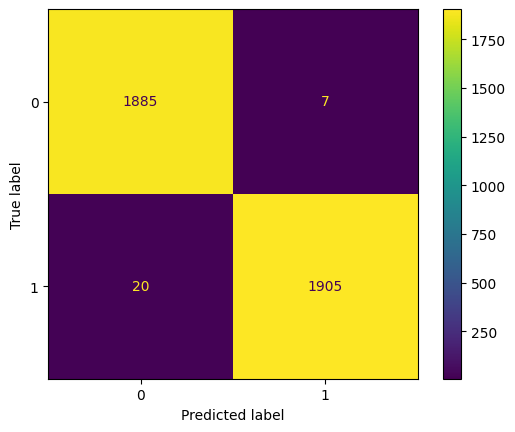

In [36]:
# Create a confusion matrix to visualize the results of the classification model

# Compute values for confusion matrix
### YOUR CODE HERE ###
log_cm = confusion_matrix(y_val, y_pred_rf)
print(log_cm)

# Create display of confusion matrix using ConfusionMatrixDisplay()
### YOUR CODE HERE ###
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
### YOUR CODE HERE ###
log_disp.plot()

# Display plot
### YOUR CODE HERE ###
plt.show()

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the model.
<br> </br>

**Note:** In other labs there was a custom-written function to extract the accuracy, precision, recall, and F<sub>1</sub> scores from the GridSearchCV report and display them in a table. You can also use scikit-learn's built-in [`classification_report()`](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) function to obtain a similar table of results.

In [37]:
# Create a classification report
# Create classification report for random forest model
### YOUR CODE HERE ###

target_labels = ['opinion', 'claim']

print(classification_report(y_val, y_pred_rf, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      0.99      1892
       claim       1.00      0.99      0.99      1925

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



**Question:** What does your classification report show? What does the confusion matrix indicate?  


For Random forest model:
* TP = 1905
* TN = 1885
* FP = 7
* FN = 20

#### **XGBoost**

Now, evaluate the XGBoost model on the validation set.

In [38]:
# Use the best estimator to predict on the validation data
### YOUR CODE HERE ###
y_pred_xgb = xgb_cv.best_estimator_.predict(X_val)

[[1888    4]
 [  22 1903]]


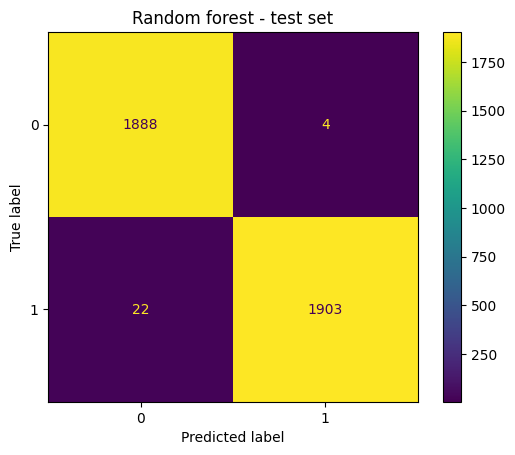

In [39]:
# Compute values for confusion matrix
### YOUR CODE HERE ###
log_cm = confusion_matrix(y_val, y_pred_xgb)
print(log_cm)

# Create display of confusion matrix using ConfusionMatrixDisplay()
### YOUR CODE HERE ###
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
### YOUR CODE HERE ###
log_disp.plot()

# Display plot
### YOUR CODE HERE ###
plt.title('Random forest - test set');
plt.show()

In [40]:
# Create a classification report
### YOUR CODE HERE ###
target_labels = ['opinion', 'claim']

print(classification_report(y_val, y_pred_xgb, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      0.99      1892
       claim       1.00      0.99      0.99      1925

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



**Question:** Describe your XGBoost model results. How does your XGBoost model compare to your random forest model?

For XGBoost model:
* TP = 1903
* TN = 1888
* FP = 4
* FN = 22

Since, based on the decision made earlier to prioritize FNs over FPs due to the cost associated with it, we can conclude on selecting the Random Forest classifier as the champion model because the FNs were more in XGBoost than random forest

### **Use champion model to predict on test data**

In [41]:
### YOUR CODE HERE ###
y_pred_champ = rf_cv.best_estimator_.predict(X_test)

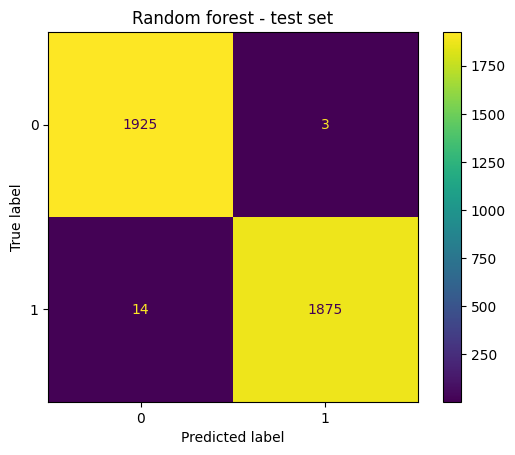

In [42]:
# Compute values for confusion matrix
### YOUR CODE HERE ###
log_cm = confusion_matrix(y_test, y_pred_champ)

# Create display of confusion matrix using ConfusionMatrixDisplay()
### YOUR CODE HERE ###
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
### YOUR CODE HERE ###
log_disp.plot()

# Display plot
### YOUR CODE HERE ###
plt.title('Random forest - test set')
plt.show()

#### **Feature importances of champion model**


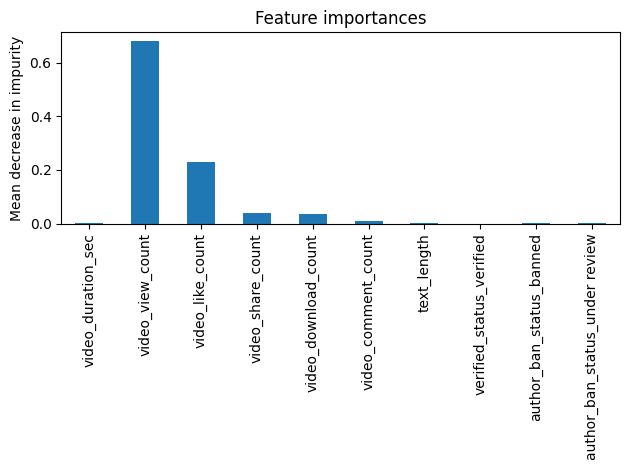

In [43]:
### YOUR CODE HERE ###

# extract important features from the random forest
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test.columns)

# plot the important features
fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

**Question:** Describe your most predictive features. Were your results surprising?
* It is quite surprising that the most engaged (viewed,liked,shared,downloaded) videos are likely to be 'claim' (violating the terms of service) 

### **Task 8. Conclusion**

In this step use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**

* Yes, because 1) the random forest model did well in validation data 2) RF did well on unseen test data 3) It had better evaluation metrics 4) it was the better at not letting FNs rise 5) important features from the model can also be used to understand which contributed more


2. **What was your model doing? Can you explain how it was making predictions?**

* Almost all engagement metrics had the hold in determining if a video is 'claim' or 'opinion' in the random forest model used. The higher these engagement metrics were, the higher was the chance was the video is 'claim'


3. **Are there new features that you can engineer that might improve model performance?**

* there can be new features introduced after consulting with the SMEs. But, as of now no new features needs to be added as the model performs exceptionally well

4. **What features would you want to have that would likely improve the performance of your model?**

* some of the more contextual features about the videos (especially info about the report) like theme of reason for the report, number of different users who reported the video, output from sentiment analysis of comments etc. can be used as features moving forward. But, this needs to be done only if the current way of classification is deemed unapplicable by the SMEs.


Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion.


**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.